In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#pip install upsetplot
from upsetplot import plot as uplot
from upsetplot import from_memberships

In [9]:
# Load data (contaminants removed in Excel, unique peptides >= 2)

u_s4 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig4 - db.proteins.LK.xlsx", sheet_name = 'Hits')
u_s5 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig5 - db.proteins.LK.xlsx", sheet_name = 'Hits')
u_s7 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig7 - db.proteins.LK .xlsx", sheet_name = 'Hits')
u_s8 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig8 - db.proteins LK.xlsx", sheet_name = 'Hits')
u_s9 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig9 - db.proteins LK.xlsx", sheet_name = 'Hits')
u_s11 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig11 - db.proteins LK.xlsx", sheet_name = 'Hits')
u_s14 = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/230821-u2os-pPL/230818 Siglec Ligand - pPL - U2OS - Fc-Sig14 - db.proteins.LK.xlsx", sheet_name = 'Hits')


In [10]:
# Load RBP list
RBPs = pd.read_excel("/Users/laurenkageler/Dropbox/230720 MS analysis/csRBP list.xlsx", sheet_name = 'csRBP Candidates')

Text(0.5, 1.0, 'U2OS Siglec Upset Plot ')

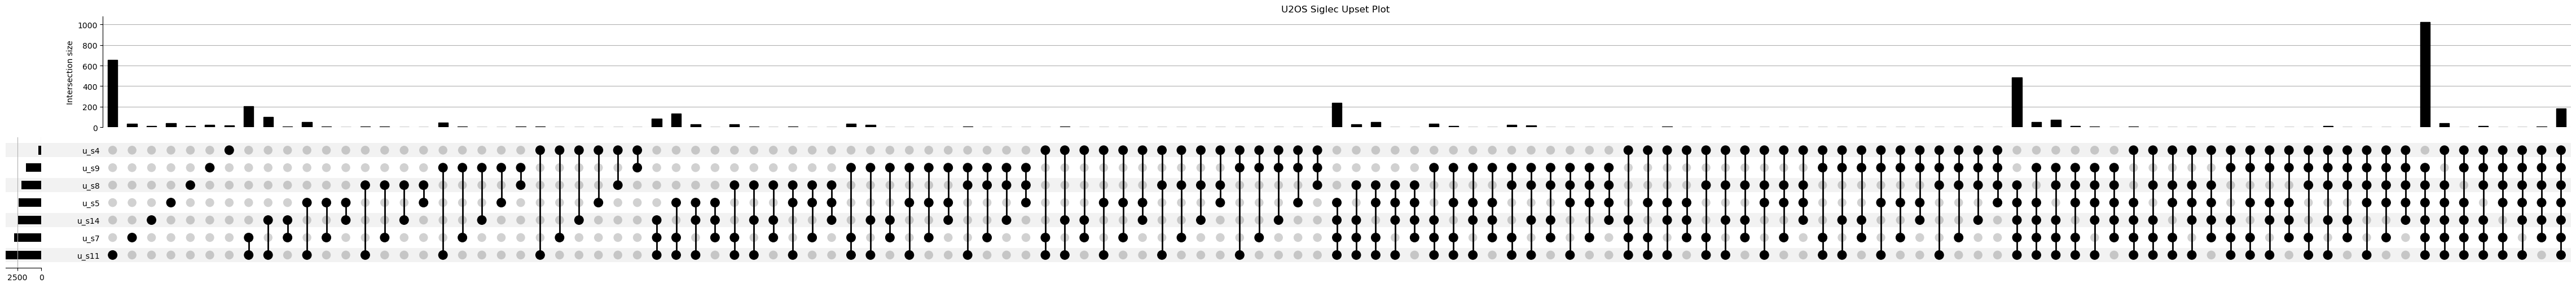

In [11]:
from itertools import combinations

# Define function to perform intersections with unique entries across seven datasets
def upset_7(A, B, C, D, E, F, G):
    sets = [set(A), set(B), set(C), set(D), set(E), set(F), set(G)]
    set_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    subsets = {}
    
    # Generate all the possible combinations and their intersections
    for r in range(1, 8):  # 1 to 7
        for subset in combinations(range(7), r):
            key = '&'.join([set_names[i] for i in subset])
            intersected = set.intersection(*[sets[i] for i in subset])
            for s in range(7):  # Remove the non-involved sets
                if s not in subset:
                    intersected -= sets[s]
            subsets[key] = intersected
    
    data = [list(subset) for subset in subsets.values()]
    len_data = [len(subset) for subset in subsets.values()]
    return [data, len_data]

# Define datasets to intersect
A = u_s4['Gene Name']
B = u_s5['Gene Name']
C = u_s7['Gene Name']
D = u_s8['Gene Name']
E = u_s9['Gene Name']
F = u_s11['Gene Name']
G = u_s14['Gene Name']

data, len_data = upset_7(A, B, C, D, E, F, G)

# Generate table for upset plot


set_names_actual = ['u_s4', 'u_s5', 'u_s7', 'u_s8', 'u_s9', 'u_s11', 'u_s14']

# Generate all the possible combinations for the from_memberships table
membership_combinations = []

for r in range(1, 8):  # 1 to 7
    for subset in combinations(set_names_actual, r):
        membership_combinations.append(list(subset))

# Use these combinations in the from_memberships function
table = from_memberships(membership_combinations, data=len_data)

uplot(table)
plt.title('U2OS Siglec Upset Plot ')



In [12]:
# Intersect list of U2OS Sig11 with hit lists from each proximity labeling experiment

Sig11_u2os_list =u_s11['Gene Name']


Sig11_A_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(A)]
Sig11_B_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(B)]
Sig11_C_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(C)]
Sig11_D_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(D)]
Sig11_E_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(E)]
Sig11_F_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(F)]
Sig11_G_intersection = Sig11_u2os_list[Sig11_u2os_list.isin(G)]

# Convert to lists (if needed):
Sig11_A_list = list(Sig11_A_intersection)
Sig11_B_list = list(Sig11_B_intersection)
Sig11_C_list = list(Sig11_C_intersection)
Sig11_D_list = list(Sig11_D_intersection)
Sig11_E_list = list(Sig11_E_intersection)
Sig11_F_list = list(Sig11_F_intersection)
Sig11_G_list = list(Sig11_G_intersection)


In [13]:

# Convert lists to sets and find the intersection
common_gene_names_set = set(Sig11_A_list).intersection(Sig11_B_list)

# Convert the set back to a list if needed
common_gene_names_list = list(common_gene_names_set)

print(common_gene_names_list)


['RBBP4', 'USP14', 'LMNB2', 'UBE2L3', 'U2AF1', 'MAP4', 'H4C1', 'NCL', 'UBA52', 'NPM1', 'HNRNPCL1', 'RPS10', 'PDIA4', 'CBX3', 'CNN2', 'RPL3', 'KTN1', 'ANP32E', 'LUC7L2', 'PSMA4', 'EPHB1', 'BLVRB', 'RPS21', 'ITGB1', 'DNAJA1', 'UBC', 'COPS4', 'NRP1', 'EMG1', 'HSP90AB1', 'FLNB', 'U2AF1L5', 'GSPT1', 'UBE2V1', 'MRC2', 'FEN1', 'MYL12A', 'FXR1', 'PRPF31', 'FUBP1', 'LMNB1', 'UQCRC1', 'TAGLN2', 'EZR', 'ALB', 'PGK1', 'PSMC1', 'HSPA8', 'CALB2', 'HNRNPD', 'AFP', 'PSMC3', 'TPM4', 'SF3A1', 'YBX3', 'HNRNPF', 'PEX1', 'HBD', 'MSN', 'PLEC', 'RPS27A', 'AHNAK', 'CD44', 'H2BS1', 'BANF1', 'EEF1A1', 'PRDX2', 'PLXNB2', 'YWHAG', 'ST13', 'CNN3', 'UGP2', 'VDAC1', 'ITGA2', 'PGK2', 'LRRC59', 'STRAP', 'TPM3', 'TRIM28', 'H2BC18', 'PDIA3', 'CYB5B', 'FKBP1A', 'MYL9', 'UBB', 'EEF1B2', 'RPL17', 'PLIN3', 'HSP90AA2P', 'PPIA', 'PSMA6', 'UBE2V2', 'CCT2', 'HNRNPA1', 'PRDX5', 'ACTN2', 'SRSF6', 'THBS1', 'RPS2', 'GNAI1', 'RPLP2', 'ACTN1', 'CPSF2', 'NME2', 'RTRAF', 'ALDOA', 'OCLN', 'ATP1A2', 'S100A11', 'HSPA9', 'CD46', 'GSPT2', '

In [12]:
df = pd.DataFrame({
    'Sig11_A': pd.Series(Sig11_A_list),
    'Sig11_B': pd.Series(Sig11_B_list),
    'Sig11_C': pd.Series(Sig11_C_list),
    'Sig11_D': pd.Series(Sig11_D_list),
    'Sig11_E': pd.Series(Sig11_E_list),
    'Sig11_F': pd.Series(Sig11_F_list),
    'Sig11_G': pd.Series(Sig11_G_intersection)
})

# Save to Excel:
df.to_excel('Sig11_Intersections.xlsx', index=False)

In [14]:

# Intersect list of RBPs with hit lists from each proximity labeling experiment
RBP_list = RBPs['Gene']

# Intersect with datasets A to G:
RBP_A = pd.DataFrame(RBP_list[RBP_list.isin(A)])
RBP_B = pd.DataFrame(RBP_list[RBP_list.isin(B)])
RBP_C = pd.DataFrame(RBP_list[RBP_list.isin(C)])
RBP_D = pd.DataFrame(RBP_list[RBP_list.isin(D)])
RBP_E = pd.DataFrame(RBP_list[RBP_list.isin(E)])
RBP_F = pd.DataFrame(RBP_list[RBP_list.isin(F)])
RBP_G = pd.DataFrame(RBP_list[RBP_list.isin(G)])


#add these list of gene names to an excel 

In [14]:
df_intersections = pd.DataFrame({
    'M13 10e4': pd.Series(A),
    'M13 Sig11': pd.Series(B),
    'u2os 10e4': pd.Series(C),
    'u2os Sig11': pd.Series(D),
})

# Create a consolidated DataFrame
consolidated_df = pd.DataFrame({
    'RBP_A': RBP_A['Gene'],
    'RBP_B': RBP_B['Gene'],
    'RBP_C': RBP_C['Gene'],
    'RBP_D': RBP_D['Gene'],
    'RBP_E': RBP_E['Gene'],
    'RBP_F': RBP_F['Gene'],
    'RBP_G': RBP_G['Gene'],
})

# Save to Excel
consolidated_df.to_excel('RBP_Intersections.xlsx', index=False)


In [15]:
#import seaborn as sns

#load all datasets into one dataframe for generation of an enrichment heatmap 
datasets = [u_s4, u_s5,u_s7, u_s8, u_s9, u_s11, u_s14]  # add  datasets to the list
dataset_names = ['u_s4', 'u_s5','u_s7', 'u_s8', 'u_s9', 'u_s11', 'u_s14']  # add dataset names
      
# Merge all datasets on 'Gene Name'
merged = datasets[0]
for df in datasets[1:]:
    merged = merged.merge(df, on='Gene Name', how='outer', suffixes=('', '_next'))



In [16]:
# Fill NaN values with 0
merged.fillna(0, inplace=True)


In [17]:
# Set 'Gene Name' as the index for heatmap
merged.set_index('Gene Name', inplace=True)



In [18]:
merged.head()

,Accession,Enrich Sig4,Accession_next,Enrich Sig5,Accession_next,Enrich Sig7,Unnamed: 3,Unnamed: 4,Unnamed: 5,Accession_next,Enrich Sig8,Accession_next,Enrich Sig9,Accession_next,Enrich Sig11,Accession_next,Enrich Sig14
Gene Name,,,,,,,,,,,,,,,,,
EEF1A1,P68104,415.000000,P68104,253.666667,P68104,368.666667,0.0,0.0,0,P68104,233.0,P68104,78.000000,P68104,641.666667,P68104,570.000000
EEF1A1P5,Q5VTE0,415.000000,Q5VTE0,251.000000,Q5VTE0,366.666667,0.0,0.0,0,Q5VTE0,230.0,Q5VTE0,77.000000,Q5VTE0,631.000000,Q5VTE0,564.666667
EEF1A2,Q05639,403.666667,Q05639,147.666667,Q05639,186.666667,0.0,0.0,0,Q05639,143.0,Q05639,23.000000,Q05639,369.333333,Q05639,414.333333
GAPDH,P04406,342.666667,0,0.000000,0,0.000000,0.0,0.0,0,0,0.0,P04406,23.666667,0,0.000000,0,0.000000
HSP90AA1,P07900,246.000000,P07900,188.333333,P07900,274.000000,0.0,0.0,0,P07900,156.0,P07900,80.000000,P07900,322.000000,P07900,222.000000


In [19]:
columns_to_drop = [col for col in merged.columns if 'Accession' in col or 'Unnamed' in col]
merged_clean = merged.drop(columns=columns_to_drop)

In [20]:
print(merged_clean.head())

           Enrich Sig4  Enrich Sig5  Enrich Sig7  Enrich Sig8  Enrich Sig9  \
Gene Name                                                                    
EEF1A1      415.000000   253.666667   368.666667        233.0    78.000000   
EEF1A1P5    415.000000   251.000000   366.666667        230.0    77.000000   
EEF1A2      403.666667   147.666667   186.666667        143.0    23.000000   
GAPDH       342.666667     0.000000     0.000000          0.0    23.666667   
HSP90AA1    246.000000   188.333333   274.000000        156.0    80.000000   

           Enrich Sig11  Enrich Sig14  
Gene Name                              
EEF1A1       641.666667    570.000000  
EEF1A1P5     631.000000    564.666667  
EEF1A2       369.333333    414.333333  
GAPDH          0.000000      0.000000  
HSP90AA1     322.000000    222.000000  


In [63]:
merged_clean.to_excel('Merged_clean_HMap.xlsx', index=False)

In [22]:
print('Gene Name' in merged_clean.columns)


False


In [66]:
#merged_clean = merged_clean.reset_index()


In [67]:
#merged_clean.to_excel('Merged_clean_HMap.xlsx', index=False)

In [8]:
import pandas as pd

#import merged_clean from excel sheet 
merged_clean = pd.read_excel('/Users/laurenkageler/Dropbox/230720 MS analysis/Merged_clean_HMap.xlsx')

In [23]:
from clustergrammer2 import Network, CGM2
import pandas as pd

In [24]:

df = {}
df['Enrichment Scores'] = merged_clean
print(df['Enrichment Scores'].shape)

(4123, 7)


In [25]:
df['Enrichment Scores'].head()

,Enrich Sig4,Enrich Sig5,Enrich Sig7,Enrich Sig8,Enrich Sig9,Enrich Sig11,Enrich Sig14
Gene Name,,,,,,,
EEF1A1,415.000000,253.666667,368.666667,233.0,78.000000,641.666667,570.000000
EEF1A1P5,415.000000,251.000000,366.666667,230.0,77.000000,631.000000,564.666667
EEF1A2,403.666667,147.666667,186.666667,143.0,23.000000,369.333333,414.333333
GAPDH,342.666667,0.000000,0.000000,0.0,23.666667,0.000000,0.000000
HSP90AA1,246.000000,188.333333,274.000000,156.0,80.000000,322.000000,222.000000


In [32]:
# Assuming merged_clean is already a pandas DataFrame
#print(merged_clean.shape)

#from clustergrammer2 import net

#net.load_df(merged_clean)

# Convert the index of your DataFrame to string
merged_clean.index = merged_clean.index.astype(str)

#from clustergrammer2 import net
#net.load_df(merged_clean)


In [33]:
net.load_df(merged_clean)

In [34]:
net.widget()

CGM2(network='{"row_nodes": [{"name": "EEF1A1-1", "ini": 4123, "clust": 1999, "rank": 4120, "rankvar": 4117}, …